# Adobe GenSolve X GeeksforGeeks Round 2

Team Name: AnM

Participants : Aarchi Kothari(IITR),
               J Mukul(IITR)
               
               Made with <3

# **Regularisation of Curves**

In [ ]:
# imports
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from sklearn.linear_model import LinearRegression

In [ ]:
# read csv - as given in PS
def read_csv(csv_path):
    np_path_XYs=np.genfromtxt(csv_path,delimiter=',')
    path_XYs=[]
    for i in np.unique(np_path_XYs[:,0]):
        npXYs=np_path_XYs[np_path_XYs[:,0]==i][:,1:]
        XYs=[]
        for j in np.unique(npXYs[:,0]):
            XY=npXYs[npXYs[:,0]==j][:,1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# plot image - as given in PS
def plot_polylines(paths_XYs, save_path=None):
    fig, ax = plt.subplots(tight_layout=True, figsize=(4, 4))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')

    if save_path:
        plt.savefig(save_path, format='jpg')

    plt.show()

## Open Curve

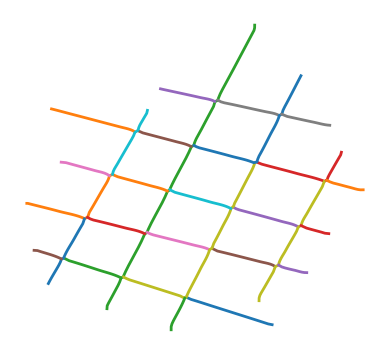

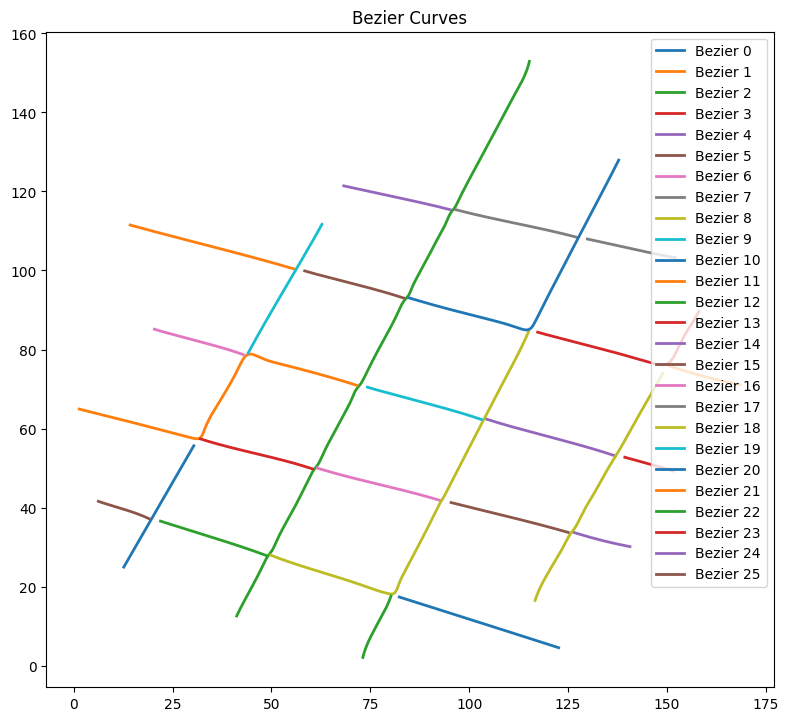

In [ ]:
def adjust_control_points(points):
    # Ensure the first and last segments are straight
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] -points[-3]
       # for i in range(1, len(points) - 1):
        #    points[i] = (points[i - 1] + points[i + 1]) / 2
    return points

def generate_bezier_curve(points, s=0.8):
    points = adjust_control_points(points)
    tck, u = splprep([points[:, 0], points[:, 1]], s=s, k=3)
    unew = np.linspace(0, 1.0, 2000)
    out = splev(unew, tck)
    return out

def plot_bezier_curves(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            bezier_curve = generate_bezier_curve(XY)
            ax.plot(bezier_curve[0], bezier_curve[1], linewidth=2, label=f'Bezier {i}')
    ax.set_aspect("equal")
    plt.legend()
    plt.title('Bezier Curves')
    plt.show()

# Example usage
csv_path2 = "frag2.csv"
paths2 = read_csv(csv_path2)
plot_polylines(paths2)
plot_bezier_curves(paths2)

Mean Squared Error: 6.506655761499232e-28
Maximum Deviation: 1.1368683772161603e-13


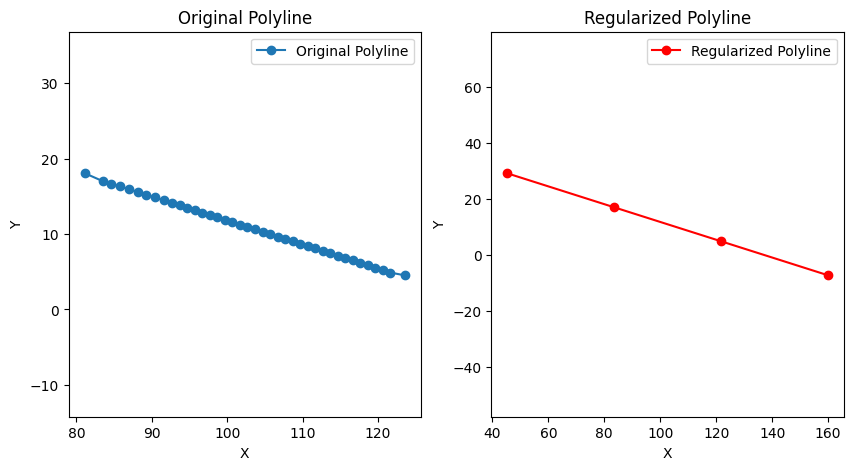

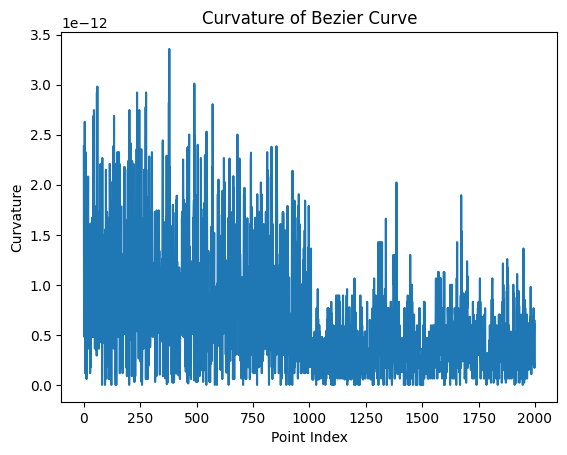

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Interpolate points to match the number of points in Bezier curve
def interpolate_points(points, num_points):
    distances = np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1))
    cumulative_distances = np.concatenate(([0], np.cumsum(distances)))
    target_distances = np.linspace(0, cumulative_distances[-1], num_points)
    interpolated_points = np.zeros((num_points, 2))
    interpolated_points[:, 0] = np.interp(target_distances, cumulative_distances, points[:, 0])
    interpolated_points[:, 1] = np.interp(target_distances, cumulative_distances, points[:, 1])
    return interpolated_points

# Regularize straight lines in the polyline
def regularize_straight_lines(points):
    if len(points) < 3:
        return points

    new_points = [points[0]]
    for i in range(1, len(points) - 1):
        v1 = points[i] - points[i - 1]
        v2 = points[i + 1] - points[i]
        v1_norm = v1 / np.linalg.norm(v1)
        v2_norm = v2 / np.linalg.norm(v2)
        if not np.allclose(v1_norm, v2_norm, atol=1e-2):
            new_points.append(points[i])

    new_points.append(points[-1])
    return np.array(new_points)

# Evaluate accuracy of the Bezier curve compared to the original polyline
def evaluate_accuracy(original, bezier):
    original_interpolated = interpolate_points(original, len(bezier))
    if original_interpolated.shape != bezier.shape:
        raise ValueError(f"Shape mismatch: {original_interpolated.shape} and {bezier.shape}")

    mse = np.mean((original_interpolated - bezier) ** 2)
    max_deviation = np.max(np.abs(original_interpolated - bezier))
    return mse, max_deviation

# Calculate curvature of the Bezier curve
def calculate_curvature(bezier):
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

# Example usage
def main():
    csv_path2 = "frag2.csv"
    paths2 = read_csv(csv_path2)

    # Evaluate accuracy for the first polyline and Bezier curve
    original_points = paths2[0][0]

    # Regularize the straight lines in the original points
    regularized_points = regularize_straight_lines(original_points)

    bezier_curve = generate_bezier_curve(regularized_points, s=0.8)
    mse, max_deviation = evaluate_accuracy(regularized_points, bezier_curve)

    print(f"Mean Squared Error: {mse}")
    print(f"Maximum Deviation: {max_deviation}")

    # Plot original polyline and regularized polyline
    plt.figure(figsize=(10, 5))

    # Original polyline
    plt.subplot(1, 2, 1)
    plt.plot(original_points[:, 0], original_points[:, 1], 'o-', label='Original Polyline')
    plt.title('Original Polyline')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')

    # Regularized polyline
    plt.subplot(1, 2, 2)
    plt.plot(regularized_points[:, 0], regularized_points[:, 1], 'o-', color='r', label='Regularized Polyline')
    plt.title('Regularized Polyline')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')

    plt.show()

    # Calculate and plot curvature
    curvature = calculate_curvature(bezier_curve)
    plt.plot(curvature)
    plt.title('Curvature of Bezier Curve')
    plt.xlabel('Point Index')
    plt.ylabel('Curvature')
    plt.show()

if __name__ == "__main__":
    main()


## Isolated Shapes


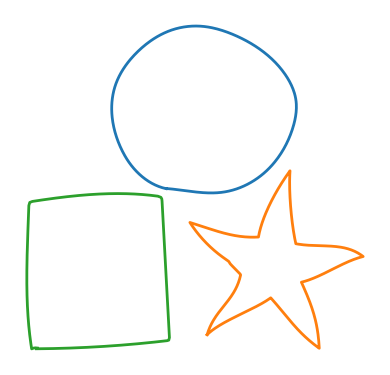

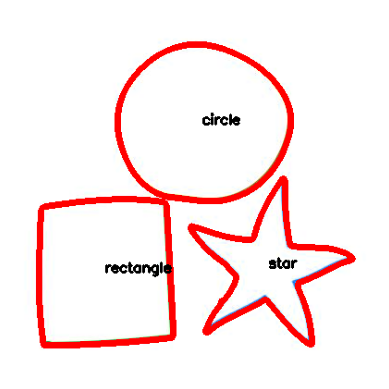

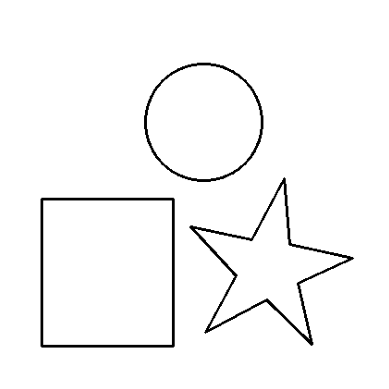

In [ ]:


# Load and process the image
img = read_csv('isolated.csv')
plot_polylines(img, 'isolated.jpg')
img = cv2.imread('isolated.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
contour, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def getShapeName(approx):
    if len(approx) == 2:
        shape_name = "line"
    elif len(approx) == 3:
        shape_name = "triangle"
    elif len(approx) == 4 or len(approx) == 5:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            shape_name = "square"
        else:
            shape_name = "rectangle"
    elif len(approx) > 12:
        shape_name = "circle"
    elif detect_star_shape(approx):
        shape_name = "star"
    elif detect_ellipse(approx):
        shape_name = "ellipse"
    elif detect_rounded_rectangle(approx):
        shape_name = "rounded rectangle"
    else:
        shape_name = "polygon"
    return shape_name

def detect_star_shape(approx, min_vertices=10, angle_threshold=140):
    if len(approx) < min_vertices:
        return False

    angles = []
    for i in range(len(approx)):
        p1 = approx[i - 2][0]
        p2 = approx[i - 1][0]
        p3 = approx[i][0]

        v1 = p2 - p1
        v2 = p3 - p2
        angle = np.degrees(np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))
        angles.append(angle)

    for angle in angles:
        if angle > angle_threshold or angle < 180 - angle_threshold:
            return True
    return False

def detect_ellipse(approx):
    if len(approx) > 5:  # An ellipse typically has more than 5 points after approximation
        ellipse = cv2.fitEllipse(approx)
        (x, y), (MA, ma), angle = ellipse
        aspect_ratio = min(MA, ma) / max(MA, ma)
        if 0.8 <= aspect_ratio <= 1.2:
            return True
    return False

def detect_rounded_rectangle(approx, curvature_threshold=0.03):
    if len(approx) == 4:
        hull = cv2.convexHull(approx)
        if cv2.isContourConvex(hull):
            perimeter = cv2.arcLength(approx, True)
            area = cv2.contourArea(approx)
            roundness = (4 * np.pi * area) / (perimeter ** 2)
            if roundness < 1 - curvature_threshold:
                return True
    return False

for i, cont in enumerate(contour):
    epsilon = 0.01 * cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, epsilon, True)
    cv2.drawContours(img, [cont], 0, (255, 0, 0), 5)

    M = cv2.moments(cont)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    shape_name = getShapeName(approx)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    elif shape_type == "rounded rectangle":
        x, y, w, h = cv2.boundingRect(points)
        cv2.rectangle(image, (x, y), (x+w, y+h), 0, 2)
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    elif shape_type == "star":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    height, width = image.shape
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

shape_image = np.ones_like(img) * 255

for cont in contour:
    epsilon = 0.01 * cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, epsilon, True)
    shape_name = getShapeName(approx)
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    elif shape_name == 'rectangle':
        draw_shape(shape_image, 'rectangle', approx)
    elif shape_name == 'circle':
        draw_shape(shape_image, 'circle', approx)
    elif shape_name == 'polygon':
        draw_shape(shape_image, 'polygon', approx)
    elif shape_name == 'star':
        draw_shape(shape_image, 'star', approx)
    elif shape_name == 'ellipse':
        draw_shape(shape_image, 'ellipse', approx)
    elif shape_name == 'rounded rectangle':
        draw_shape(shape_image, 'rounded rectangle', approx)

plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(shape_image)
plt.axis('off')
plt.show()


## Closed Shapes


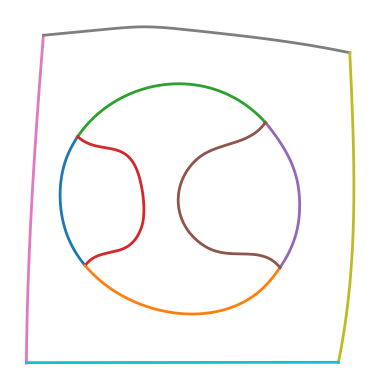

rectangle
rectangle
circle
irregular
irregular
circle


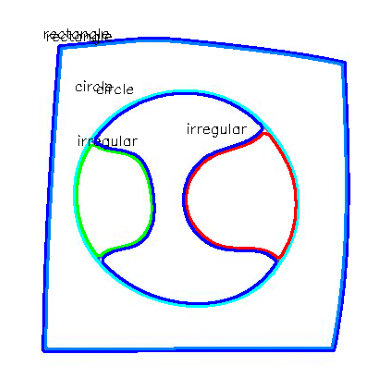

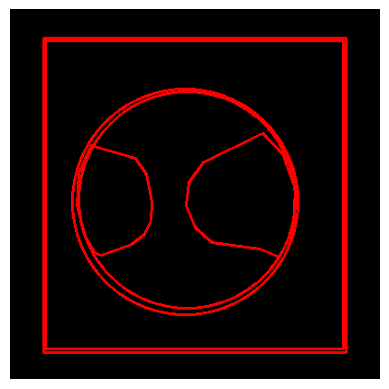

In [ ]:
def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept

def draw_shape(image, shape_type, points):
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 255, 2)
    elif shape_type == "rectangle":
        # cv2.drawContours(image, [points], 0, 255, 2)
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 255, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(image, center, radius, 255, 2)
    elif shape_type == "irregular":
        cv2.polylines(image, [points], isClosed=True, color=255, thickness=2)

def draw_fitted_line(image, slope, intercept, color):
    height, width = image.shape
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)

    cv2.line(image, (x1, y1), (x2, y2), color, 2)

img = read_csv('frag0.csv')
plot_polylines(img, 'frag0.jpg')
img = cv2.imread('frag0.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
contour, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


def getShapeName(approx):
    if len(approx) == 2:
        shape_name = "line"
    elif len(approx) == 3:
        shape_name = "triangle"
    elif len(approx) == 4 or len(approx) == 5:
        shape_name = "rectangle"

    elif len(approx) > 12:
        shape_name = "circle"
    else:
        shape_name = "irregular"
    return shape_name

for i, cont in enumerate(contour):

    # Approximate the contour
    epsilon = 0.0095 * cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, epsilon, True)
    # print(len(approx))
    # Draw the contour
    colors = [(0, 0, 255), (0, 128, 255), (0, 255, 255), (0, 255, 0), (255, 0, 0)]
    cv2.drawContours(img, [cont], 0, colors[i%len(colors)], 2)

    # Calculate moments for the center of the contour
    M = cv2.moments(cont)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    shape_name = getShapeName(approx)
    # Put the text near the center of the shape
    x, y, w, h = cv2.boundingRect(cont)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

shape_image = np.zeros_like(img)



for cont in contour:
    if i == 0:
        i = 1
        continue

    epsilon = 0.0095 * cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, epsilon, True)
    shape_name = getShapeName(approx)
    print(shape_name)
    if shape_name == 'rectangle':
        draw_shape(shape_image, 'rectangle', approx)
    elif shape_name == 'circle':
        draw_shape(shape_image, 'circle', approx)
    elif shape_name == 'irregular':
        draw_shape(shape_image, 'irregular', approx)


plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(shape_image)
plt.axis('off')
plt.show()

# **Completing Incomplete Curve**

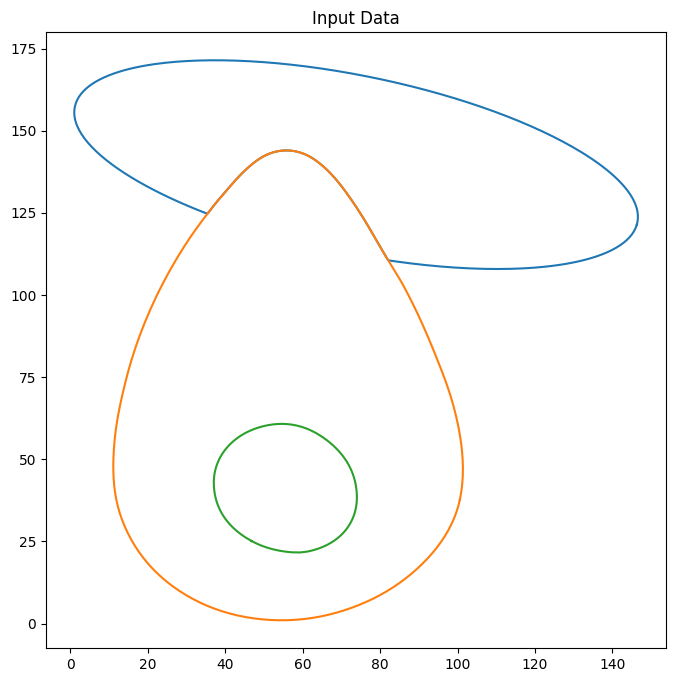

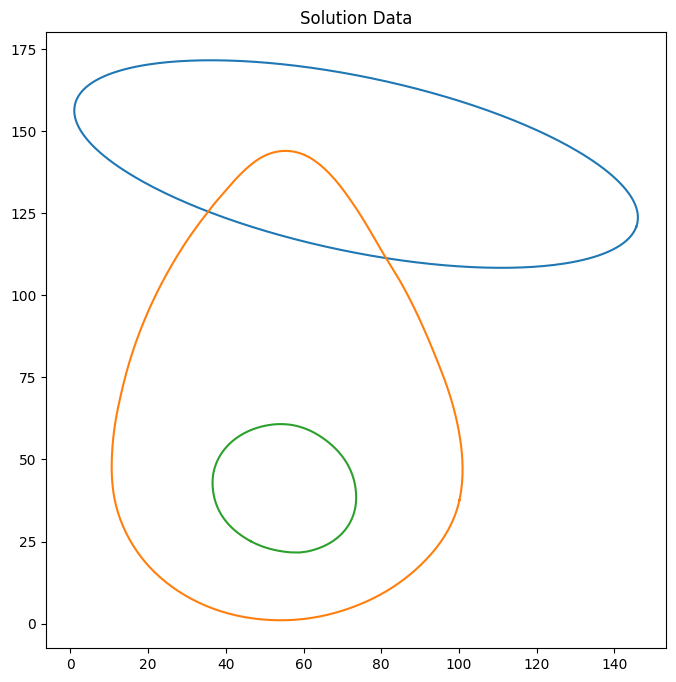

In [ ]:
def plot_paths(path_XYs, title="Plot"):
    plt.figure(figsize=(8, 8))
    for XYs in path_XYs:
        for XY in XYs:
            plt.plot(XY[:, 0], XY[:, 1])
    plt.title(title)
    plt.show()

input_csv_path = 'occlusion1.csv'
solution_csv_path = 'occlusion1_sol.csv'

input_data = read_csv(input_csv_path)
solution_data = read_csv(solution_csv_path)

plot_paths(input_data, "Input Data")
plot_paths(solution_data, "Solution Data")

In [ ]:
def preprocess_data(paths_XYs):
    X, y = [], []
    for path in paths_XYs:
        for segment in path:
            X.extend(segment[:-1])
            y.extend(segment[1:])
    return np.array(X), np.array(y)

X_train, y_train = preprocess_data(input_data)
X_test, y_test = preprocess_data(solution_data)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (830, 2)
Shape of y_train: (830, 2)
Shape of X_test: (815, 2)
Shape of y_test: (815, 2)


In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='linear'))  # Output two coordinates
    return model

model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 - 1s - 65ms/step - loss: 4334.8867 - mae: 50.9614 - val_loss: 297.8444 - val_mae: 14.8038
Epoch 2/50
21/21 - 0s - 6ms/step - loss: 297.4742 - mae: 13.0851 - val_loss: 19.6695 - val_mae: 3.8243
Epoch 3/50
21/21 - 0s - 6ms/step - loss: 32.7544 - mae: 4.5849 - val_loss: 11.6211 - val_mae: 2.5356
Epoch 4/50
21/21 - 0s - 6ms/step - loss: 8.6458 - mae: 2.2544 - val_loss: 1.1013 - val_mae: 0.8333
Epoch 5/50
21/21 - 0s - 5ms/step - loss: 2.7064 - mae: 1.1675 - val_loss: 1.8727 - val_mae: 1.1039
Epoch 6/50
21/21 - 0s - 6ms/step - loss: 1.3879 - mae: 0.8883 - val_loss: 1.5871 - val_mae: 0.9701
Epoch 7/50
21/21 - 0s - 6ms/step - loss: 0.9530 - mae: 0.7762 - val_loss: 1.5206 - val_mae: 0.9549
Epoch 8/50
21/21 - 0s - 6ms/step - loss: 0.7124 - mae: 0.6944 - val_loss: 1.4048 - val_mae: 0.9311
Epoch 9/50
21/21 - 0s - 7ms/step - loss: 0.6173 - mae: 0.6565 - val_loss: 1.3651 - val_mae: 0.9200
Epoch 10/50
21/21 - 0s - 6ms/step - loss: 0.5683 - mae: 0.6282 - val_loss: 1.2662 - val_mae: 0.8905
Epoch 

26/26 - 0s - 3ms/step - loss: 0.6509 - mae: 0.6384
Test MAE: 0.638367235660553


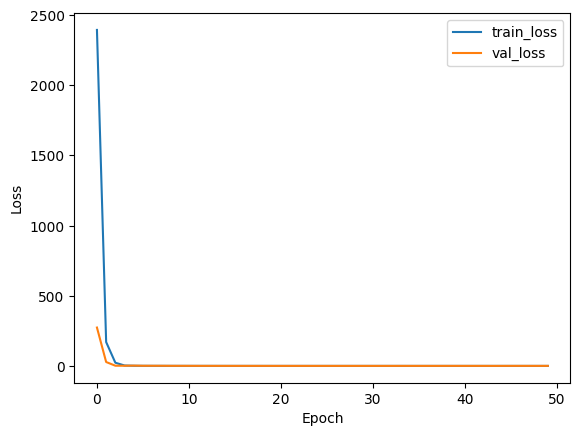

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test MAE: {mae}")

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


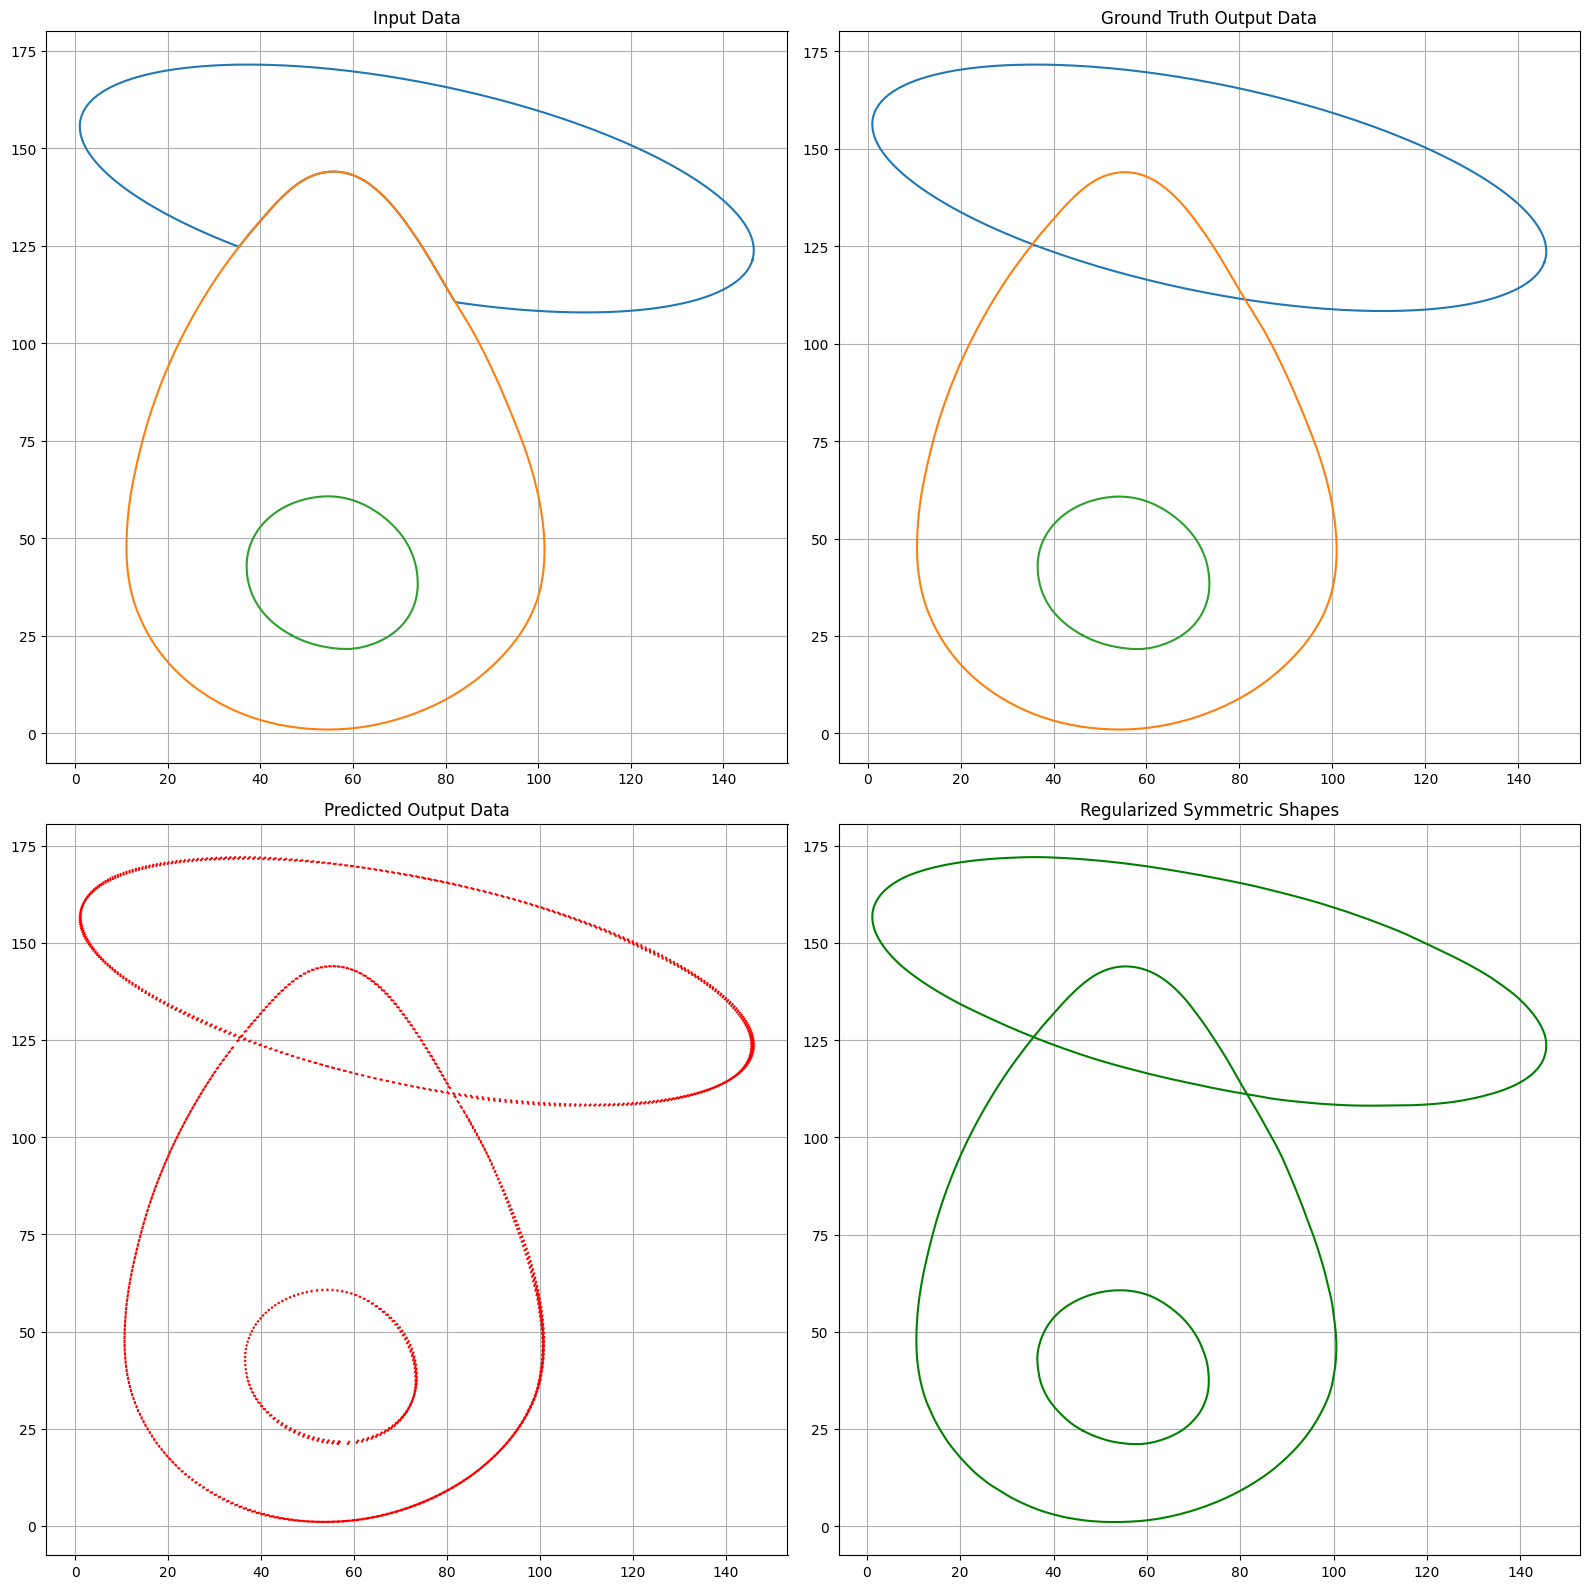

In [ ]:
def plot_all_figures(input_data, solution_data, y_pred, title=""):
    plt.figure(figsize=(16, 16))

    plt.subplot(2, 2, 1)
    for XYs in input_data:
        for XY in XYs:
            plt.plot(XY[:, 0], XY[:, 1])
    plt.title("Input Data")
    plt.grid(True)

    plt.subplot(2, 2, 2)
    for XYs in solution_data:
        for XY in XYs:
            plt.plot(XY[:, 0], XY[:, 1])
    plt.title("Ground Truth Output Data")
    plt.grid(True)

    plt.subplot(2, 2, 3)
    for i in range(len(y_pred) - 1):
        plt.plot([X_test[i, 0], y_pred[i, 0]], [X_test[i, 1], y_pred[i, 1]], 'r')
    plt.title("Predicted Output Data")
    plt.grid(True)

    plt.subplot(2, 2, 4)

    breakpoints = [0]
    for i in range(1, len(y_pred) - 1):
        dist = np.linalg.norm(y_pred[i] - y_pred[i + 1])
        if dist > threshold:
            breakpoints.append(i + 1)
    breakpoints.append(len(y_pred))

    for start, end in zip(breakpoints[:-1], breakpoints[1:]):
        plt.plot(y_pred[start:end, 0], y_pred[start:end, 1], 'g')

    plt.title("Regularized Symmetric Shapes")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

threshold = 10
y_pred = model.predict(X_test)


plot_all_figures(input_data, solution_data, y_pred, title="All Figures")

# **Exploring Symmetry in Curves**

In [58]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from skimage.measure import EllipseModel
from scipy.optimize import least_squares

In [57]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []

        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)

        path_XYs.append(XYs)

    return path_XYs
a=read_csv('isolated.csv')


print(len(a)) ## all 3 shapes
print(len(a[0])) ##circle
print(len(a[0][0])) ## representing circle
print(len(a[0][0][0])) ## representing x,y coords

3
1
419
2


In [59]:
def rdp(points, epsilon):
    def perpendicular_distance(point, line_start, line_end):
        if np.all(line_start == line_end):
            return np.linalg.norm(point - line_start)
        return np.abs(np.cross(line_end - line_start, point - line_start)) / np.linalg.norm(line_end - line_start)

    def rdp_recursive(points, epsilon):
        if len(points) < 2:
            return points

        start, end = points[0], points[-1]
        distances = np.array([perpendicular_distance(point, start, end) for point in points[1:-1]])
        index = np.argmax(distances) + 1

        if distances[index - 1] > epsilon:
            return np.vstack((rdp_recursive(points[:index + 1], epsilon), rdp_recursive(points[index:], epsilon)[1:]))
        else:
            return np.array([start, end])

    return rdp_recursive(points, epsilon)

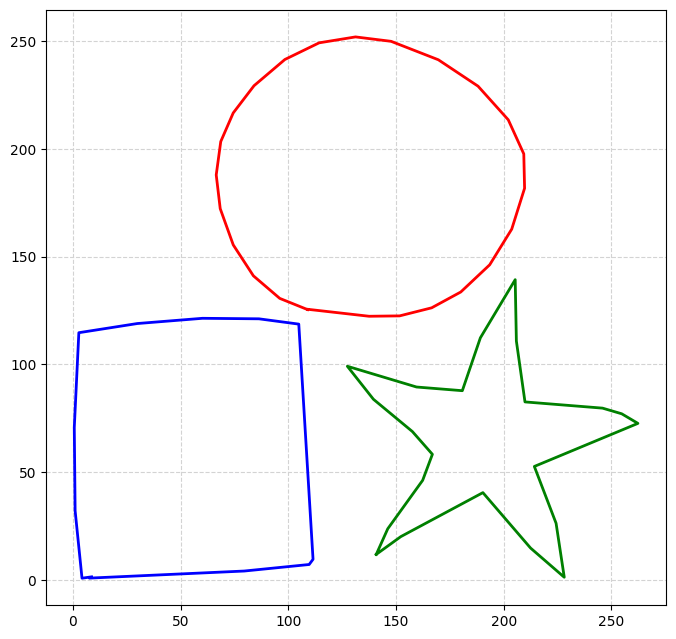

In [60]:
#Applying the RDP algorithm to each segment of every path. It processes each segment independently and then returns the list of paths with their segments simplified according to the given epsilon value.

def apply_rdp(path_XYs, epsilon=1.0):
    simplified_paths = []
    for path in path_XYs:
        simplified_path = [rdp(segment, epsilon=epsilon) for segment in path]
        simplified_paths.append(simplified_path)
    return simplified_paths
#Reflection in vertical

def reflect_points_across_vertical(points, x_line):
    return np.array([[2 * x_line - x, y] for x, y in points])
#Reflection in Horizontal

def reflect_points_across_horizontal(points, y_line):
    return np.array([[x, 2 * y_line - y] for x, y in points])
#Reflection along any line

def reflect_points_across_line(points, line_point, line_direction):
    line_point = np.array(line_point)
    line_direction = np.array(line_direction) / np.linalg.norm(line_direction)
    reflected_points = []
    for point in points:
        point = np.array(point)
        projection_length = np.dot(point - line_point, line_direction)
        projection = line_point + projection_length * line_direction
        reflection = 2 * projection - point
        reflected_points.append(reflection)
    return np.array(reflected_points)
#-Reflects a collection of paths across vertical, horizontal, or diagonal lines based on the specified symmetry_type.
#-calculates the appropriate line of symmetry for each segment of each path, applies the reflection, and returns the list of all reflected paths.

def find_symmetry_and_reflect_1(path_XYs, symmetry_type):
    reflected_paths = []
    for path in path_XYs:
        reflected_path = []
        for segment in path:
            if symmetry_type == "vertical":
                x_line = (segment[:, 0].min() + segment[:, 0].max()) / 2
                reflected_segment = reflect_points_across_vertical(segment, x_line)
            elif symmetry_type == "horizontal":
                y_line = (segment[:, 1].min() + segment[:, 1].max()) / 2
                reflected_segment = reflect_points_across_horizontal(segment, y_line)
            elif symmetry_type == "diagonal":
                line_point = [(segment[:, 0].min() + segment[:, 0].max()) / 2,
                              (segment[:, 1].min() + segment[:, 1].max()) / 2]
                line_direction = [1, 1]
                reflected_segment = reflect_points_across_line(segment, line_point, line_direction)
            reflected_path.append(reflected_segment)
        reflected_paths.append(reflected_path)
    return reflected_paths


def find_symmetry_and_reflect(path_XYs, symmetry_type):
    if symmetry_type == "angles":
        angles = np.arange(0, 181, 10)
        reflected_paths_by_angle = {}

        for angle in angles:
            line_direction = [np.cos(np.radians(angle)), np.sin(np.radians(angle))]
            reflected_paths = []

            for path in path_XYs:
                reflected_path = []
                for segment in path:
                    line_point = [(segment[:, 0].min() + segment[:, 0].max()) / 2,
                                  (segment[:, 1].min() + segment[:, 1].max()) / 2]
                    reflected_segment = reflect_points_across_line(segment, line_point, line_direction)
                    reflected_path.append(reflected_segment)
                reflected_paths.append(reflected_path)

            reflected_paths_by_angle[angle] = reflected_paths

        return reflected_paths_by_angle
#Plots representing orignal and reflected path

def plot_paths_with_symmetry(original_paths, reflected_paths, colours, symmetry_type):
    fig, ax = plt.subplots(figsize=(8, 8))
    color_idx = 0
    for original_path, reflected_path in zip(original_paths, reflected_paths):
        for segment, reflected_segment in zip(original_path, reflected_path):
            if len(segment) > 0:
                segment = np.array(segment)
                ax.plot(segment[:, 0], segment[:, 1], c=colours[color_idx % len(colours)], linewidth=2)
                ax.plot(reflected_segment[:, 0], reflected_segment[:, 1], c=colours[(color_idx + 1) % len(colours)], linestyle='--', linewidth=2)
        color_idx += 1
    ax.set_aspect('equal')
    plt.grid(True, which='both', color='lightgray', linestyle='--')
    plt.title(f"Original and {symmetry_type.capitalize()} Reflected Paths")
    plt.show()
#Plotting whole drawing

def plot(path_XYs, colours):
    fig, ax = plt.subplots(figsize=(8, 8))
    color_idx = 0
    for path in path_XYs:
        for segment in path:
            if len(segment) > 0:
                segment = np.array(segment)
                ax.plot(segment[:, 0], segment[:, 1], c=colours[color_idx % len(colours)], linewidth=2)
        color_idx += 1
    ax.set_aspect('equal')

    plt.grid(True, which='both', color='lightgray', linestyle='--')
    plt.show()
#Function executed on a example

csv_path = "isolated.csv"
path_XYs = read_csv(csv_path)
simplified_paths = apply_rdp(path_XYs, epsilon=1.0)

colours = ['r', 'g', 'b']

plot(simplified_paths, colours)

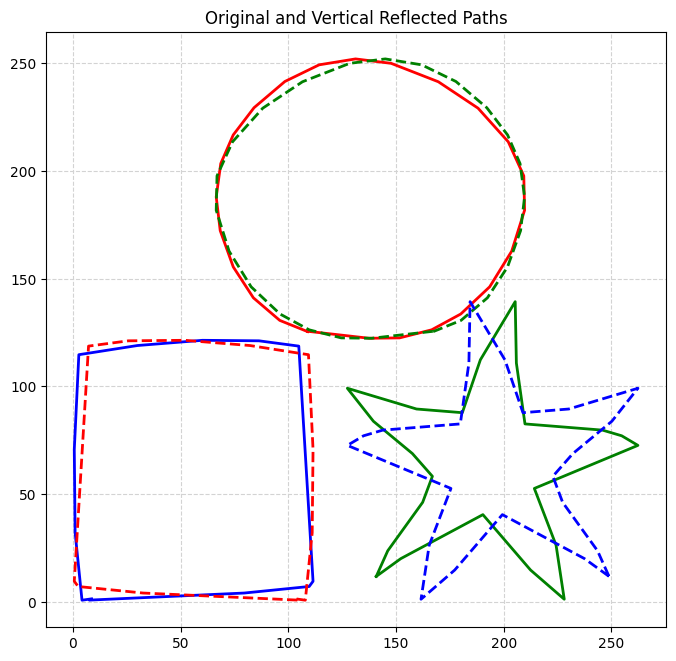

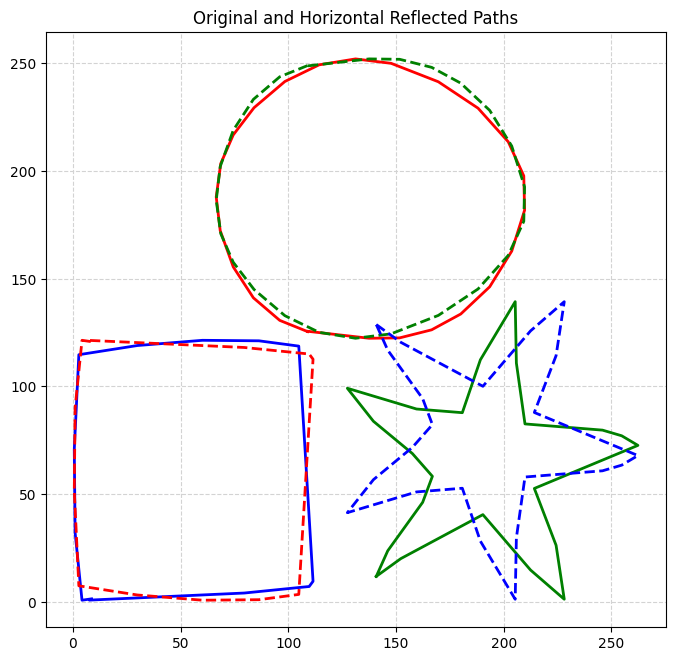

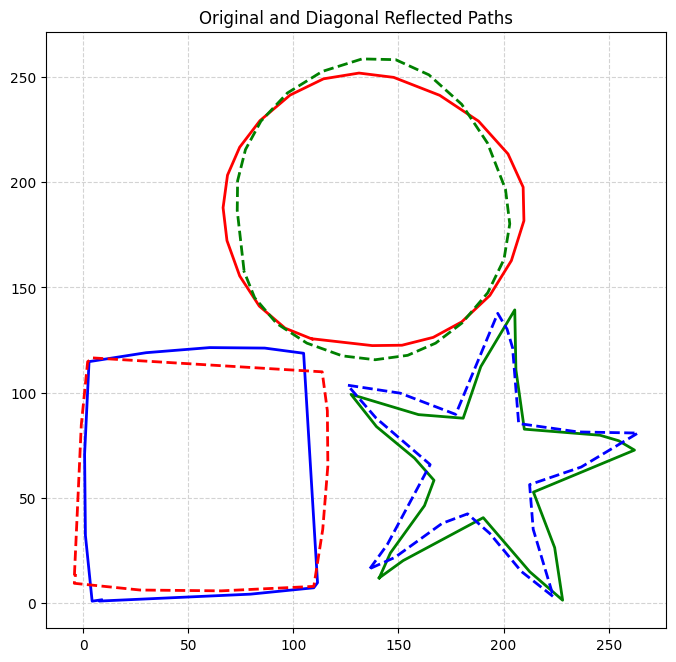

In [61]:
#Visualizing all symmetries

reflected_paths_vertical = find_symmetry_and_reflect_1(simplified_paths, "vertical")
plot_paths_with_symmetry(simplified_paths, reflected_paths_vertical, colours, "vertical")

reflected_paths_horizontal = find_symmetry_and_reflect_1(simplified_paths, "horizontal")
plot_paths_with_symmetry(simplified_paths, reflected_paths_horizontal, colours, "horizontal")

reflected_paths_diagonal = find_symmetry_and_reflect_1(simplified_paths, "diagonal")
plot_paths_with_symmetry(simplified_paths, reflected_paths_diagonal, colours, "diagonal")

Alignment score for 0 degrees symmetry: 80.42
Alignment score for 10 degrees symmetry: 79.57
Alignment score for 20 degrees symmetry: 78.90
Alignment score for 30 degrees symmetry: 77.31
Alignment score for 40 degrees symmetry: 74.92
Alignment score for 50 degrees symmetry: 73.39
Alignment score for 60 degrees symmetry: 75.70
Alignment score for 70 degrees symmetry: 78.27
Alignment score for 80 degrees symmetry: 79.71
Alignment score for 90 degrees symmetry: 80.88
Alignment score for 100 degrees symmetry: 81.37
Alignment score for 110 degrees symmetry: 80.99
Alignment score for 120 degrees symmetry: 81.18
Alignment score for 130 degrees symmetry: 81.21
Alignment score for 140 degrees symmetry: 81.53
Alignment score for 150 degrees symmetry: 82.19
Alignment score for 160 degrees symmetry: 81.87
Alignment score for 170 degrees symmetry: 81.39
Alignment score for 180 degrees symmetry: 80.42
Best symmetry angle found: 50 degrees


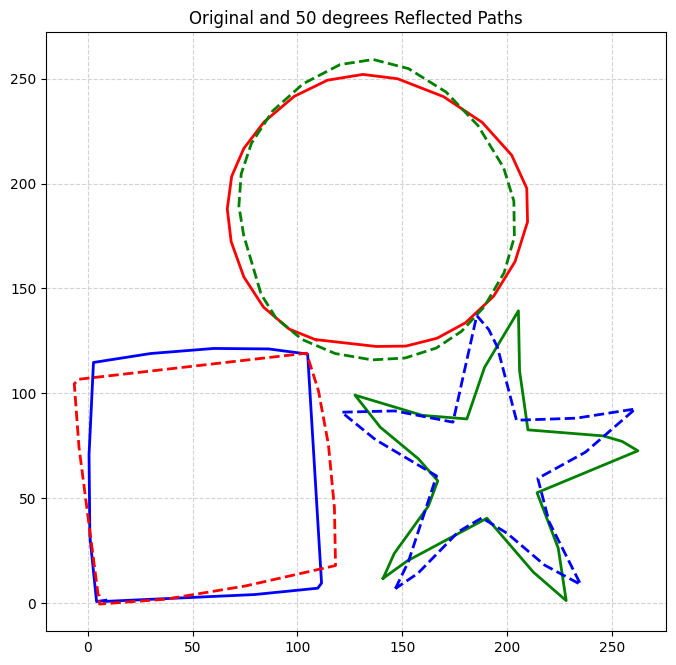

In [62]:
#Evaluating how good is a symmetry line

def calculate_alignment(original_paths, reflected_paths):
    total_distance = 0
    count = 0
    for original_path, reflected_path in zip(original_paths, reflected_paths):
        for original_segment, reflected_segment in zip(original_path, reflected_path):
            if len(original_segment) > 0 and len(reflected_segment) > 0:

                min_len = min(len(original_segment), len(reflected_segment))
                original_segment = original_segment[:min_len]
                reflected_segment = reflected_segment[:min_len]

                distances = np.linalg.norm(original_segment - reflected_segment, axis=1)
                total_distance += np.sum(distances)
                count += len(distances)
    return total_distance / count if count > 0 else float('inf')
#Finding best symmetry axis

def find_best_symmetry_axis(original_paths):
    reflected_paths_by_angle = find_symmetry_and_reflect(original_paths, "angles")
    best_angle = None
    best_score = float('inf')

    for angle, reflected_paths in reflected_paths_by_angle.items():
        alignment_score = calculate_alignment(original_paths, reflected_paths)
        print(f"Alignment score for {angle} degrees symmetry: {alignment_score:.2f}")

        if alignment_score < best_score:
            best_score = alignment_score
            best_angle = angle

    return best_angle,best_score
#Plotting the Symmetries

def plot_best_symmetry(original_paths, best_angle):
    reflected_paths_by_angle = find_symmetry_and_reflect(original_paths, "angles")
    reflected_paths = reflected_paths_by_angle[best_angle]
    plot_paths_with_symmetry(original_paths, reflected_paths, colours, f"{best_angle} degrees")
#Symmetries scoring done

best_angle, best_score= find_best_symmetry_axis(simplified_paths)

if best_score <90:
    print(f"Best symmetry angle found: {best_angle} degrees")
    plot_best_symmetry(simplified_paths, best_angle)
else:
    print("No suitable symmetry angle found.")

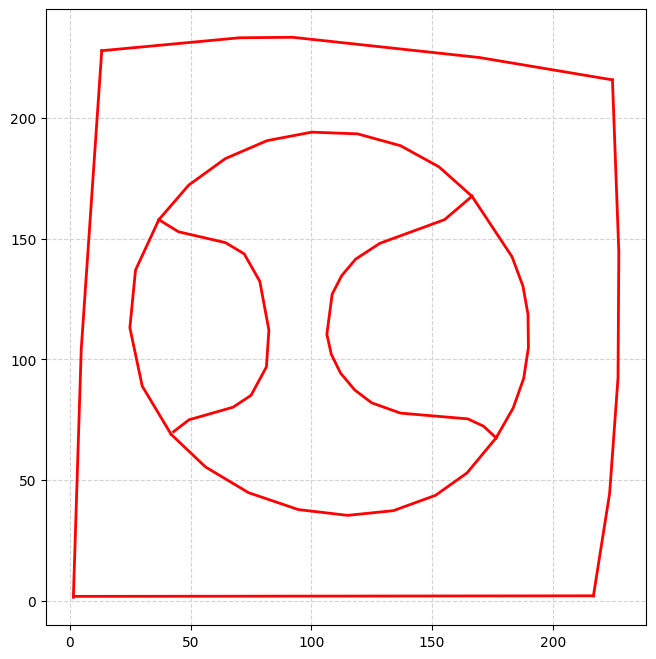

In [63]:
#Testing on new example

csv_path = "frag0.csv"
path_XYs = read_csv(csv_path)
simplified_paths = apply_rdp(path_XYs, epsilon=1.0)

colours = ['r']

plot(simplified_paths, colours)

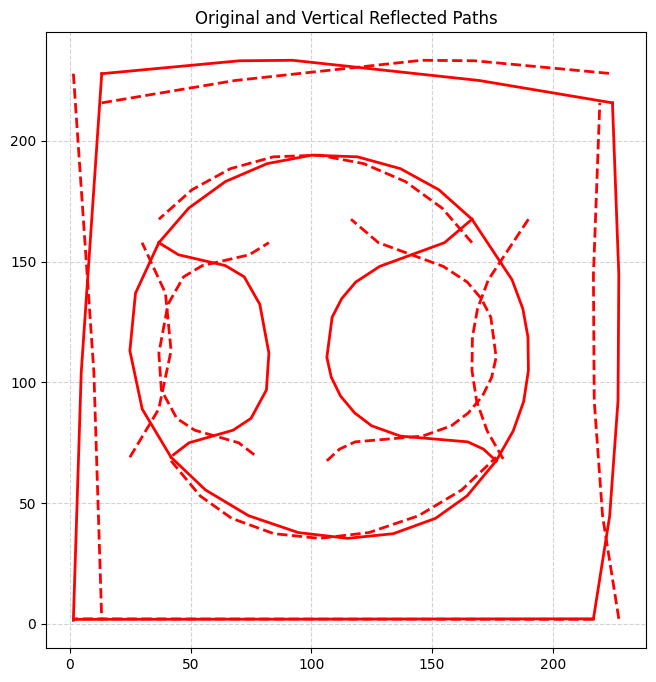

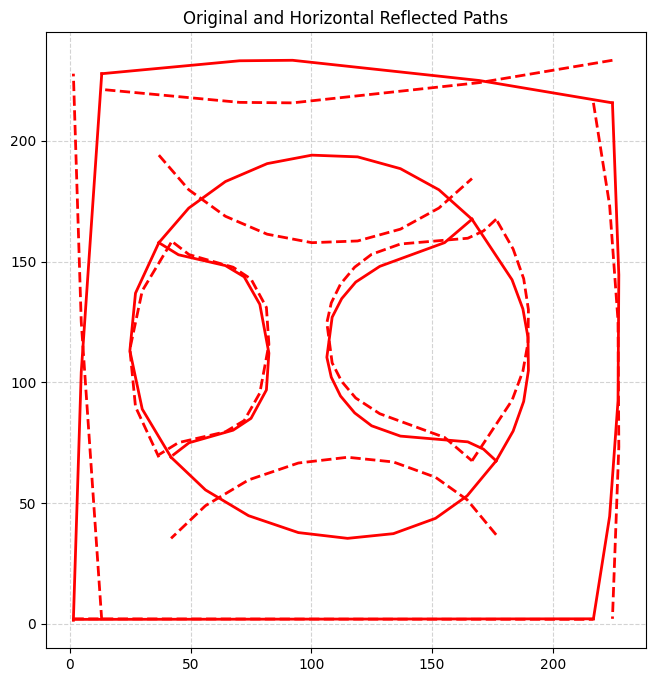

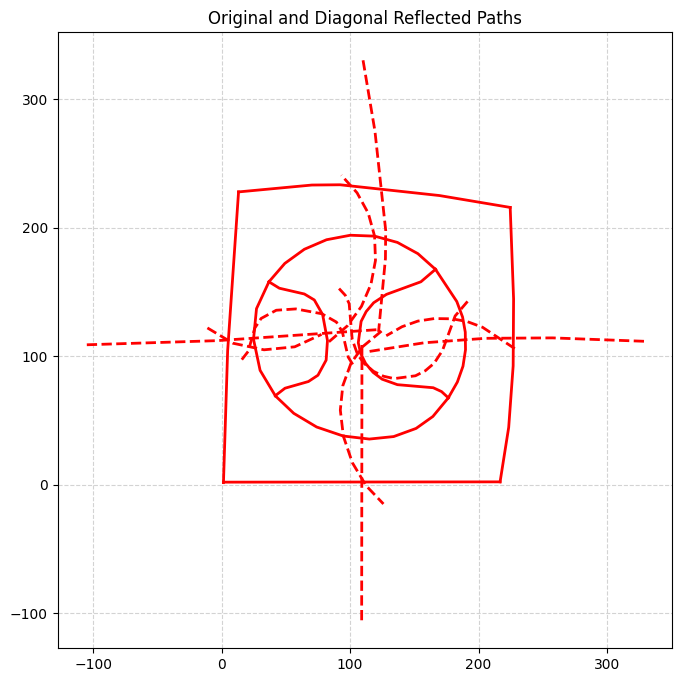

In [64]:
reflected_paths_vertical = find_symmetry_and_reflect_1(simplified_paths, "vertical")
plot_paths_with_symmetry(simplified_paths, reflected_paths_vertical, colours, "vertical")

reflected_paths_horizontal = find_symmetry_and_reflect_1(simplified_paths, "horizontal")
plot_paths_with_symmetry(simplified_paths, reflected_paths_horizontal, colours, "horizontal")

reflected_paths_diagonal = find_symmetry_and_reflect_1(simplified_paths, "diagonal")
plot_paths_with_symmetry(simplified_paths, reflected_paths_diagonal, colours, "diagonal")

Alignment score for 0 degrees symmetry: 53.90
Alignment score for 10 degrees symmetry: 56.70
Alignment score for 20 degrees symmetry: 59.71
Alignment score for 30 degrees symmetry: 62.12
Alignment score for 40 degrees symmetry: 62.87
Alignment score for 50 degrees symmetry: 62.39
Alignment score for 60 degrees symmetry: 60.72
Alignment score for 70 degrees symmetry: 58.00
Alignment score for 80 degrees symmetry: 55.16
Alignment score for 90 degrees symmetry: 53.56
Alignment score for 100 degrees symmetry: 55.14
Alignment score for 110 degrees symmetry: 56.66
Alignment score for 120 degrees symmetry: 58.21
Alignment score for 130 degrees symmetry: 59.81
Alignment score for 140 degrees symmetry: 60.39
Alignment score for 150 degrees symmetry: 59.72
Alignment score for 160 degrees symmetry: 57.93
Alignment score for 170 degrees symmetry: 55.17
Alignment score for 180 degrees symmetry: 53.90
Best symmetry axis found: 90


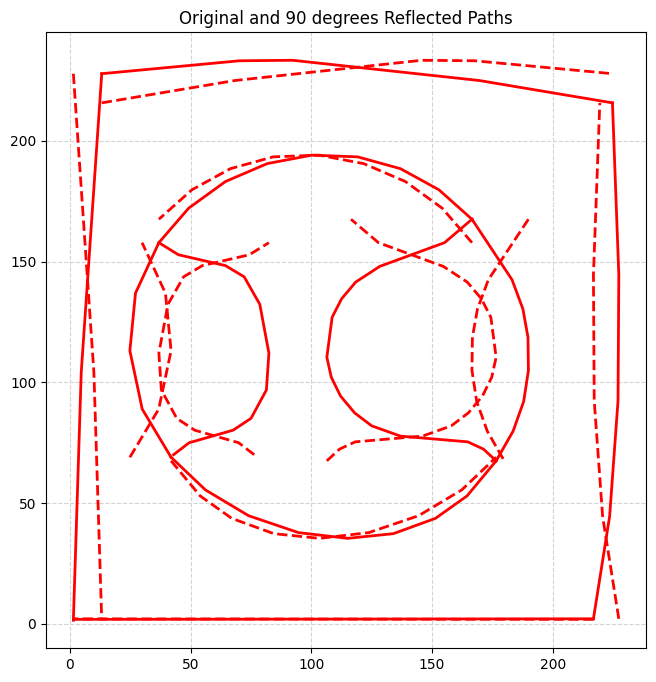

In [65]:
best_axis,best_score = find_best_symmetry_axis(simplified_paths)

if best_score<95:
    print(f"Best symmetry axis found: {best_axis}")
    plot_best_symmetry(simplified_paths, best_axis)
else:
    print("No suitable symmetry axis found.")